## Import Modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Exploratory data analysis

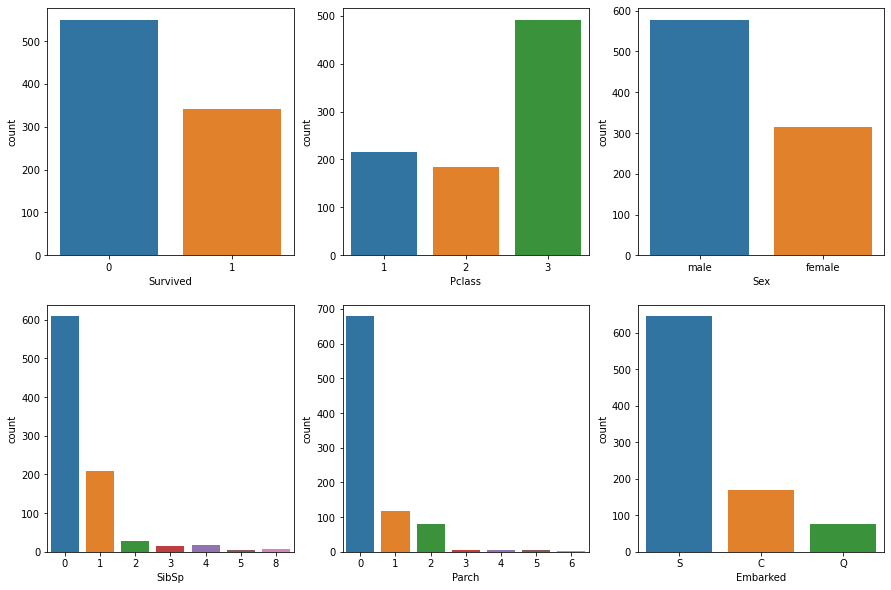

In [6]:
cat_cols = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
plt.figure(figsize =(15,10))
for i in enumerate(cat_cols):
    plt.subplot(2, 3, i[0]+1)
    sns.countplot(i[1], data = df)

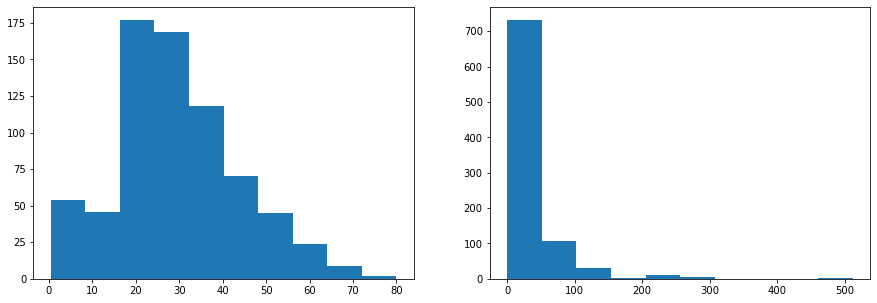

In [7]:
num_cols = ['Age', 'Fare']
plt.figure(figsize =(15,5))
for i in enumerate(num_cols):
    plt.subplot(1, 2, i[0]+1)
    plt.hist(i[1], data = df)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

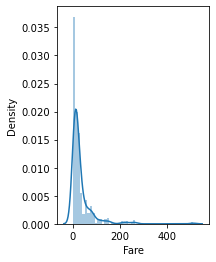

In [8]:
#plt.figure(figsize =(15,8))
plt.subplot(1, 1, 1)
sns.distplot(df['Age'])
plt.subplot(1, 2, 2)
sns.distplot(df['Fare'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

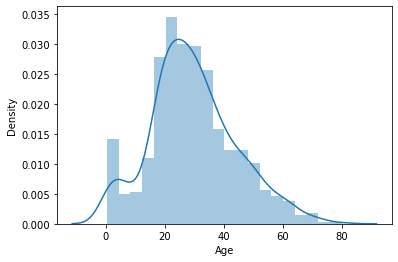

In [9]:
sns.distplot(df['Age'])

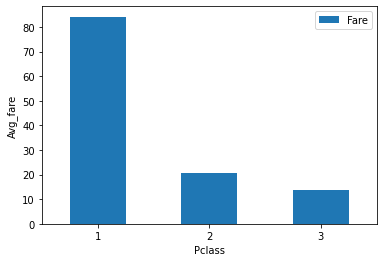

In [10]:
class_fare = df.pivot_table(index= 'Pclass',values= 'Fare')
class_fare.plot(kind= 'bar')
plt.xlabel('Pclass')
plt.ylabel('Avg_fare')
plt.xticks(rotation=0)
plt.show()

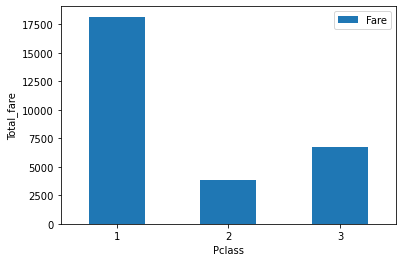

In [11]:
class_fare = df.pivot_table(index= 'Pclass',values= 'Fare', aggfunc= np.sum)
class_fare.plot(kind= 'bar')
plt.xlabel('Pclass')
plt.ylabel('Total_fare')
plt.xticks(rotation=0)
plt.show()

## Preprocessing dataset

In [12]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df = pd.concat([train, test], axis = 0)
df = df.reset_index(drop = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train_len = len(train)
test_len = len(test)
train_len


891

In [14]:
test_len

418

In [15]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [16]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [17]:
df = df.drop(columns= ['Cabin'], axis=1)

In [18]:
df['Age'].mean()

29.881137667304014

In [19]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())


In [20]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [21]:
df['Fare']= np.log(df['Fare']+1)

In [22]:
df['Fare'] = np.log(df['Fare']+1)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

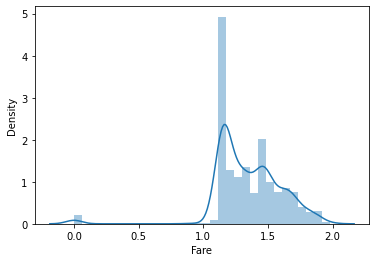

In [23]:
sns.distplot(df['Fare'])

<AxesSubplot:>

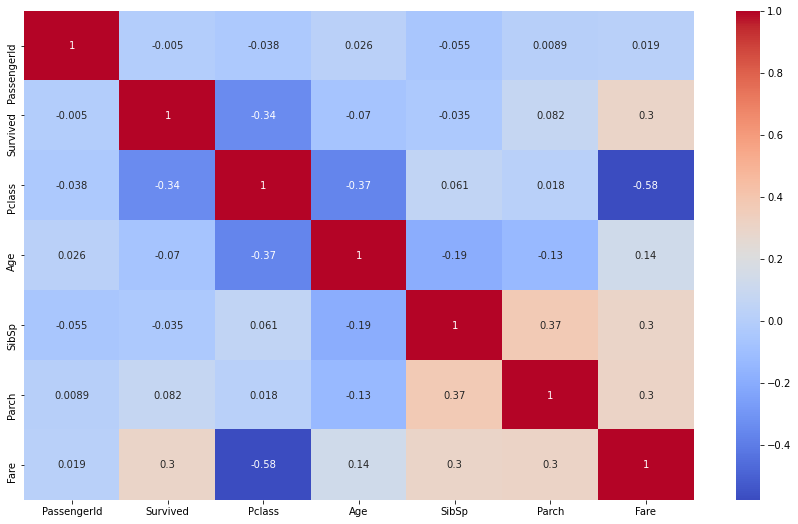

In [24]:
corr = df.corr()
plt.figure(figsize = (15,9))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

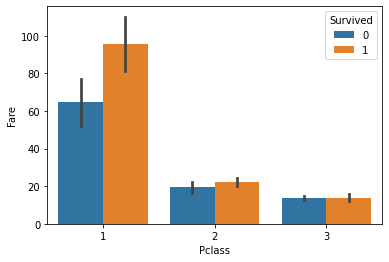

In [25]:
sns.barplot(data = train, x= 'Pclass', y='Fare', hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

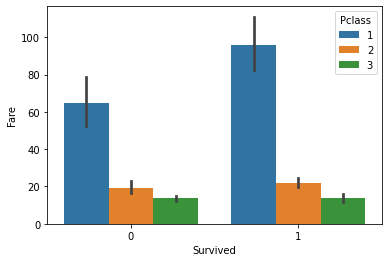

In [26]:
sns.barplot(data = train, x= 'Survived', y='Fare', hue='Pclass')

In [27]:
df = df.drop(columns = ['Name', 'Ticket'], axis=1)


In [28]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,1.134691,S
1,2,1.0,1,female,38.0,1,0,1.664038,C
2,3,1.0,3,female,26.0,0,0,1.159662,S
3,4,1.0,1,female,35.0,1,0,1.607603,S
4,5,0.0,3,male,35.0,0,0,1.164014,S


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Sex', 'Embarked']
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,1.134691,2
1,2,1.0,1,0,38.0,1,0,1.664038,0
2,3,1.0,3,0,26.0,0,0,1.159662,2
3,4,1.0,1,0,35.0,1,0,1.607603,2
4,5,0.0,3,1,35.0,0,0,1.164014,2


In [30]:
train = df.iloc[:train_len, :]
test = df.iloc[train_len:, :]

In [31]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,1.156272,1
892,893,NaN,3,0,47.0,1,0,1.124748,2
893,894,NaN,2,1,62.0,0,0,1.214638,1
894,895,NaN,3,1,27.0,0,0,1.184255,2
895,896,NaN,3,0,22.0,1,1,1.277267,2


In [32]:
X = df.drop(columns= ['PassengerId','Survived'], axis =1)
y = train['Survived']

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score
def classify(model):
    x_train, x_train, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train,y_train)
    print('Accuracy: ', model.score(x_test, y_test))
    
    score = cross_val_score(model, X, y, cv=5)
    print('cv score: ', np.mean(score))

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

ValueError: Found input variables with inconsistent numbers of samples: [1309, 891]

In [35]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier
classify(model)

ValueError: Found input variables with inconsistent numbers of samples: [1309, 891]